In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

%matplotlib inline

plt.rcParams["figure.figsize"] = (20, 10)

saved_style_state = matplotlib.rcParams.copy()

In [3]:
filepath = "tiktok-data/tiktok_cleaned.csv"
tiktok_data = pd.read_csv(filepath)
tiktok_data.head()

,author_nickname,author_signature,author_uniqueId,author_verified,authorStats_diggCount,authorStats_followerCount,authorStats_followingCount,authorStats_heart,authorStats_heartCount,authorStats_videoCount,...,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75
0,Snake movie 54,Thank you for following along,lkmouhxrd6f,False,9,489500,12.0,19400000,19400000,142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Luke,🦥\nFooty and cricket>>>\nFreo💜🤍\nFlagmantle 23...,_flagmantle,False,395,1261,39.0,56700,56700,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cirqnamics,World Renowned 7thGen Circus Family,cirqnamics,False,893,632700,977.0,17800000,17800000,289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bailey,a girl of many talents \nmy worst enemy out no...,baileyspinn,True,354200,14600000,1800.0,656000000,656000000,2334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Twins Style,🇵🇱 Poland📍\nHubert & Sebastian\n📩 twinsstyle@m...,twinsstylee,True,33100,18500000,127.0,405900000,405900000,1101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Verified Tiktok Accounts'}, ylabel='author_verified'>

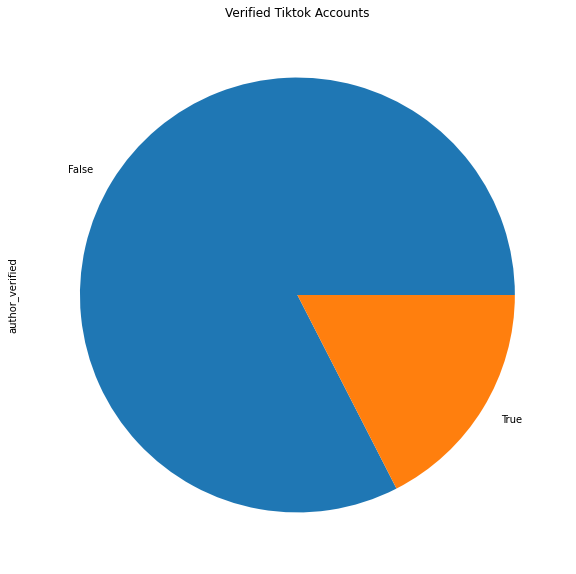

In [8]:
verified_count = tiktok_data['author_verified'].value_counts()
verified_count.plot(kind='pie', title='Verified Tiktok Accounts')

TypeError: 'value' must be an instance of str or bytes, not a float

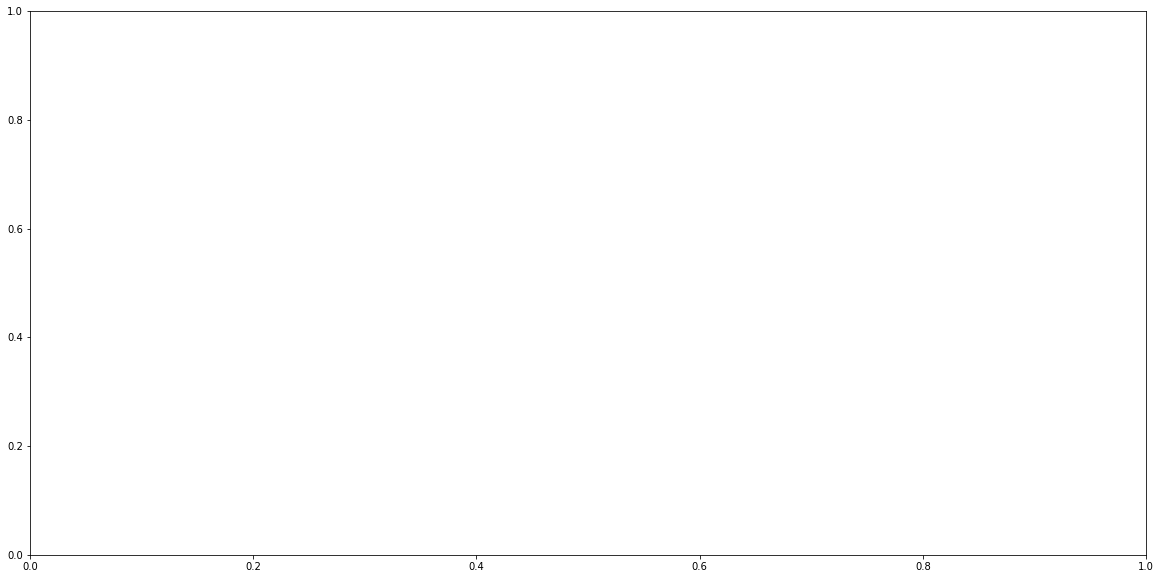

In [27]:
#ratio of follers to following
plt.scatter(tiktok_data.authorStats_followerCount, tiktok_data.authorStats_videoCount, color='thistle',s=300, marker='*')

Text(0, 0.5, 'Y Values')

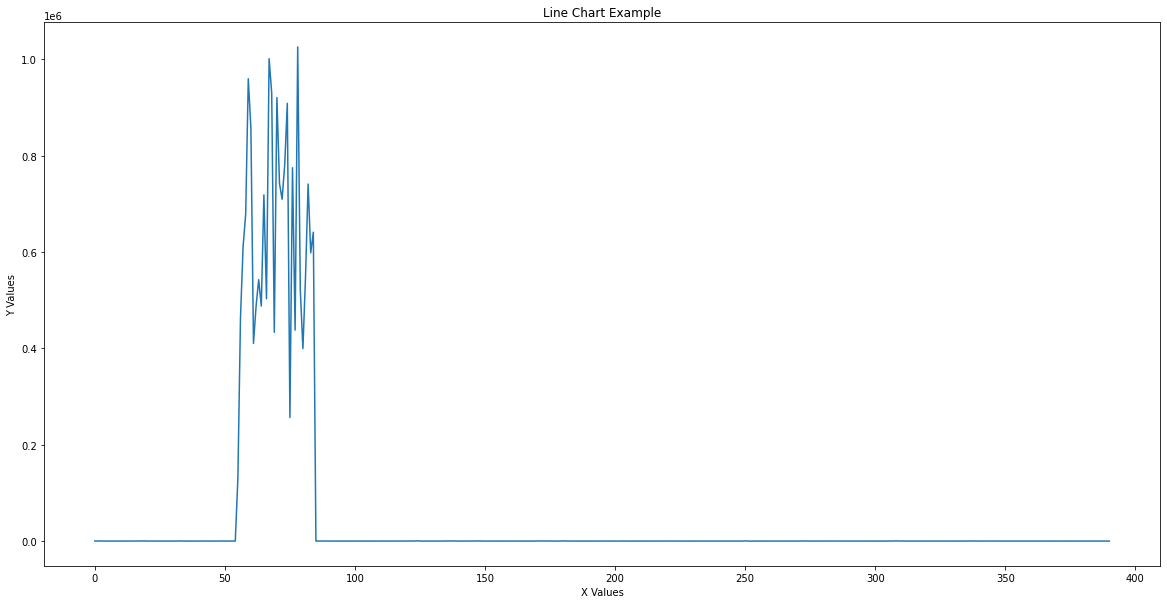

In [39]:
tiktok_data.video_duration.plot(kind='line')
plt.title('Line Chart Example')
plt.xlabel('X Values')
plt.ylabel('Y Values')


In [12]:
#extract most popular hashtags
import re
def extract_hashtags(description):
    return re.findall(r'#\w+', description)

tiktok_data['hashtags'] = tiktok_data['desc'].apply(extract_hashtags)

TypeError: expected string or bytes-like object

In [15]:
def extract_emojis(text):
    return [c for c in text if c in emoji.UNICODE_EMOJI['en']]

# for each row of tiktok_data.desc we extract the emojis and add them to a new column
for index, row in tiktok_data.iterrows():
    emojis = extract_emojis(row['desc'])
    tiktok_data.at[index, 'emojis'] = emojis

ModuleNotFoundError: No module named 'emoji'

In [22]:
author_desc = tiktok_data['author_signature']
author_desc.head(20)

0                         Thank you for following along
1     🦥\nFooty and cricket>>>\nFreo💜🤍\nFlagmantle 23...
2                   World Renowned 7thGen Circus Family
3     a girl of many talents \nmy worst enemy out no...
4     🇵🇱 Poland📍\nHubert & Sebastian\n📩 twinsstyle@m...
5     Follow my Braiding IG:beautybyalicedimplz12\n⬇...
6     We will no longer be doing overnight fan meetu...
7     1.4M+ SUBS ON YOUTUBE! Link ⬆️\nNarrating the ...
8     🐶CEDAR - Border Collie\n🐶SPRINKLE - Iggy \n📧 c...
9     Update every day, thank you for your attention...
10    Just a grumpy mum with a annoying son \n👼🏼🥊👵🏼\...
11     I do my best to be creative 👇🏼click this button.
12                     Share movies\nFollow me for more
13                                         hi, i’m josh
14    Se vuoi ridere sei nel posto giusto😎 \nIf u wa...
15                                         VX:TikTok508
16    Thank YOU for 1M 🙏🏼\nNew video every day of 20...
17              Rank these... But you can't chan

In [21]:
author_name = tiktok_data['author_nickname']
author_name.head(20)

0               Snake movie 54
1                         Luke
2                   cirqnamics
3                       Bailey
4                  Twins Style
5                alice_mukendi
6              Content Machine
7               Brennan Rogers
8             Cedarandsprinkle
9                            Y
10    Grumpy Leanne & Maitland
11      Lucas Peterson BMX art
12                 soulttterry
13                     Hi Josh
14                Khabane lame
15                     fomeshz
16                    Hullsome
17              Ranking Game 🥇
18                     akkdwmd
19          Haunting Favorites
Name: author_nickname, dtype: object